## Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

## 1. Collecting Data

- **About dataset**: Discover the world's top universities. Explore the QS World University Rankings® 2023 based on 8 key ranking indicators. This year’s QS World University Rankings include almost 1,500 institutions from around the world. It’s not just iconic institutions that take the top spots: this year’s highest rankings include universities from diverse locations across Europe, Asia and North America.
- **Data source**: I got the dataset from Kaggle https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223?resource=download
- **Consent**: Yes the author allow me to use this dataset like this.
- **How did the author collect this data**: The author didn't state how he collected the data, but he did give me the source where he collected the data https://www.topuniversities.com/university-rankings/world-university-rankings/2023

## 2. Exploring Data

### Store data to a dataframe

In [2]:
ranking_df = pd.read_csv('2023 QS World University Rankings.csv')
ranking_df.head()

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


### How many rows and columns in dataset?

In [3]:
num_rows = len(ranking_df)
num_cols = len(ranking_df.columns)
print ("Number of rows in dataset: ", num_rows )
print ("Number of cols in dataset: " , num_cols)

Number of rows in dataset:  1422
Number of cols in dataset:  21


### What is the meaning of each row? Are there any 2 rows with different meaning?

According to the dataset, each row provides information about a university (ranking, name, location, ar score, ar rank,...). No outlier line.

### Is the data duplicated?

In [4]:
if (len(ranking_df) != len(set(ranking_df["Rank"]))):
    print("There are duplicates")
else: print("No duplicates found!")

No duplicates found!


### What is the meaning of each row?

- **Rank**: Rank of the university.
- **institution**: Name of the Institution.
- **location code**: Location Code.
- **location**: Location of the University.
- **ar score**: Academic Reputation score.
- **ar rank**: Academic Reputation rank.
- **er score**: Employer Reputation score.
- **er rank**: Employer Reputation rank.
- **fsr score**: Faculty Student score.
- **fsr rank**: Faculty Student rank.
- **cpf score**: Citations per faculty score.
- **cpf rank**: Citations per faculty rank.
- **ifr score**: International Faculty score.
- **ifr rank**: International Faculty rank.
- **isr score**: International Students score.
- **isr rank**: International Students rank.
- **irn score**: International Research Network score.
- **irn rank**: International Research Network rank.
- **ger score**: Employment Outcome score.
- **ger rank**: Employment Outcome rank.
- **score scaled**: Overall.

### Datatype of each column?

In [5]:
a = ranking_df.columns
Type = ranking_df.dtypes
col_dtypes = pd.Series(data = Type, index = a )
print (col_dtypes)

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank           object
er score         float64
er rank           object
fsr score        float64
fsr rank          object
cpf score        float64
cpf rank          object
ifr score        float64
ifr rank          object
isr score        float64
isr rank          object
irn score        float64
irn rank          object
ger score        float64
ger rank          object
score scaled      object
dtype: object


In the rank columns (ar rank, er rank, etc.)  there are values which "+" (for examples: "601+") means that the rank of the university is lower than that number, we dont know the exact ranking, so i'm going to remove the "+".

In [6]:
ranking_df = ranking_df.replace ("601+",601)
ranking_df = ranking_df.replace ("501+",501)
ranking_df

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501,5.8,501,3.6,601,...,601,1.7,601,NaN,NaN,8.1,601,NaN,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501,5.8,501,2.4,601,...,601,9.3,601,1.3,601,8.8,601,30.9,403,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501,2.6,501,3.2,601,...,601,5.2,601,2.8,601,51.1,601,NaN,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,501,1.8,501,2.7,601,...,601,NaN,NaN,NaN,NaN,7.5,601,8.7,601,-


Also in the "score scaled" column, there are "-" values which are just empty values, so i'm going to replace  those "-" values with empty values.

In [7]:
ranking_df = ranking_df.replace('-', np.nan)
ranking_df

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501,5.8,501,3.6,601,...,601,1.7,601,NaN,NaN,8.1,601,NaN,NaN,NaN
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501,5.8,501,2.4,601,...,601,9.3,601,1.3,601,8.8,601,30.9,403,NaN
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501,2.6,501,3.2,601,...,601,5.2,601,2.8,601,51.1,601,NaN,NaN,NaN
1420,1421,University of Craiova,RO,Romania,3.3,501,1.8,501,2.7,601,...,601,NaN,NaN,NaN,NaN,7.5,601,8.7,601,NaN


Change "score scaled" dtype to float

In [8]:
ranking_df["score scaled"] =ranking_df["score scaled"].astype(float)
a = ranking_df.columns
Type = ranking_df.dtypes
col_dtypes = pd.Series(data = Type, index = a )
print (col_dtypes)

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank           object
er score         float64
er rank           object
fsr score        float64
fsr rank          object
cpf score        float64
cpf rank          object
ifr score        float64
ifr rank          object
isr score        float64
isr rank          object
irn score        float64
irn rank          object
ger score        float64
ger rank          object
score scaled     float64
dtype: object


### How value distributed are in numerical columns

In [9]:
#The percentage of missing values:
numerical_cols = ranking_df.select_dtypes(include=np.number).copy()
missing_percentage = (numerical_cols.isna()).sum() / ranking_df.shape[0] * 100
missing_percentage


Rank             0.000000
ar score         0.000000
er score         0.070323
fsr score        0.140647
cpf score        0.351617
ifr score        6.891702
isr score        4.008439
irn score        0.914205
ger score        0.843882
score scaled    64.838256
dtype: float64

In [10]:
#Min? max?
numerical_cols.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
count,1422.000000,1422.000000,1421.000000,1420.000000,1417.000000,1324.000000,1365.000000,1409.000000,1410.000000,500.000000
mean,711.500000,20.124684,20.657143,29.997113,24.529358,31.659517,26.545348,49.570121,26.186809,44.619400
std,410.640354,22.802706,24.027928,28.172207,27.910952,34.170817,30.896854,30.205439,26.201036,18.655057
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.200000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,4.800000,3.300000,21.600000,6.700000,29.800000
50%,711.500000,10.800000,10.300000,18.250000,11.100000,13.750000,10.800000,47.700000,15.500000,38.550000
75%,1066.750000,23.775000,27.000000,43.500000,39.400000,55.075000,40.500000,77.600000,36.900000,54.500000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### How value distributed are in catagorical columns

In [11]:
#The percentage of missing values:
catagorical_cols = ranking_df.select_dtypes(exclude=np.number).copy()
missing_percentage = (catagorical_cols.isna()).sum() / ranking_df.shape[0] * 100
missing_percentage

institution      0.000000
location code    0.000000
location         0.000000
ar rank          0.000000
er rank          0.000000
fsr rank         0.000000
cpf rank         0.000000
ifr rank         6.891702
isr rank         4.008439
irn rank         0.914205
ger rank         0.843882
dtype: float64

In [12]:
#How many diffferent values? Show a few?
catagorical_cols.nunique()

institution      1422
location code     100
location          100
ar rank           500
er rank           500
fsr rank          601
cpf rank          599
ifr rank          600
isr rank          601
irn rank          601
ger rank          601
dtype: int64

### Asking meaningful question


So how can we predict the rank of a university base on other attributes? To answer this question i'm going to predict the ranking of a university base on the other scores of that university (ar score, er score, fsr score,...). Answering this question somewhat tell us about the future of the univerity (approximately which rank it's going to be, does the university deserve that ranking, what can we do to improve the ranking, etc.)

Preprocessing 

In [13]:
ranking_copy = ranking_df.copy()
#drop the unnecessary columns
ranking_copy.drop(columns = ['institution','location','location code','ar rank','er rank','fsr rank','cpf rank','ifr rank','isr rank','irn rank','ger rank','score scaled'], inplace = True)
ranking_copy.head(10)

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0
5,6,96.5,87.1,100.0,100.0,99.8,85.1,73.0,98.8
6,7,98.3,99.7,99.5,86.5,100.0,100.0,98.1,88.8
7,8,99.4,98.6,97.6,77.0,99.2,100.0,100.0,90.3
8,9,98.6,91.3,74.2,99.2,100.0,98.0,96.2,91.1
9,10,99.2,92.2,92.9,86.8,81.6,76.0,89.6,98.2


In [14]:
#check for any nan values
ranking_copy.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [15]:
#fill nan values with mean
ranking_copy['er score'].fillna(value = ranking_copy['er score'].mean(), inplace = True)
ranking_copy['fsr score'].fillna(value = ranking_copy['fsr score'].mean(), inplace = True)
ranking_copy['cpf score'].fillna(value = ranking_copy['cpf score'].mean(), inplace = True)
ranking_copy['ifr score'].fillna(value = ranking_copy['ifr score'].mean(), inplace = True)
ranking_copy['isr score'].fillna(value = ranking_copy['isr score'].mean(), inplace = True)
ranking_copy['irn score'].fillna(value = ranking_copy['irn score'].mean(), inplace = True)
ranking_copy['ger score'].fillna(value = ranking_copy['ger score'].mean(), inplace = True)

#check nan values again
ranking_copy.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

In [16]:
ranking_copy

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000
1,2,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000
2,3,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000
3,4,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000
4,5,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000
...,...,...,...,...,...,...,...,...,...
1417,1418,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809
1418,1419,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000
1419,1420,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809
1420,1421,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000


Split data

In [17]:
train, test = train_test_split(ranking_copy, test_size=0.2, random_state=17)

x_train  = train.drop("Rank", axis = 1)
y_train = train[["Rank"]]

x_test = test.drop("Rank", axis = 1)
y_test = test[["Rank"]]

x_train.head(5)


,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
241,36.1,50.5,21.2,41.900000,80.600000,54.200000,85.200000,35.3
226,7.8,1.7,97.7,80.900000,38.200000,1.700000,56.900000,4.2
651,3.3,2.4,73.0,9.800000,12.700000,20.400000,9.300000,98.7
326,25.6,37.6,52.6,25.100000,26.600000,39.900000,34.400000,50.8
1385,3.4,15.1,3.0,24.529358,31.659517,26.545348,49.570121,12.8


In [18]:
y_train.head(5)

,Rank
241,242
226,227
651,652
326,327
1385,1386


In [19]:
x_test.head(5)

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
523,4.6,1.5,20.2,86.9,31.659517,26.545348,29.7,4.7
198,25.9,22.2,100.0,38.5,38.700000,30.000000,83.0,56.1
822,1.0,3.2,15.9,39.2,49.600000,9.200000,42.9,19.0
427,25.3,24.9,36.7,27.3,20.600000,10.600000,31.2,7.5
914,21.7,11.2,5.2,1.5,2.000000,1.100000,20.1,4.1


In [20]:
y_test.head(5)

,Rank
523,524
198,199
822,823
427,428
914,915


### Linear Regression

Now i'm going to predict using Linear Regression method.

In [21]:
#  Applying LinearRegression method and training the algorithm
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

Predict

In [22]:
y_predict = regressor.predict(x_test)

Test Accuracy

In [23]:
regressor.score(x_test, y_test)

0.8298648278532359

Train Accuracy

In [24]:
regressor.score(x_train, y_train)

0.8203017261669562

MSE(Score Mean Squared Error)

In [25]:
mean_squared_error(y_test, y_predict)

30374.292935058253

RMSE(Score Root Mean Squared Error)

In [26]:
mean_squared_error(y_test, y_predict ,squared=False)

174.2822220854963

MAE(Score Mean Absolute Error)

In [27]:
mean_absolute_error(y_test, y_predict)

144.5110782141511

Compare the predicted results with the actual results using dataframe

In [45]:
compare_df = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicted': y_predict.flatten()})
compare_df.head(5)

,Real,Predicted
0,524,646.750613
1,199,137.254104
2,823,813.100497
3,428,727.575353
4,915,1133.954478


Visualize data

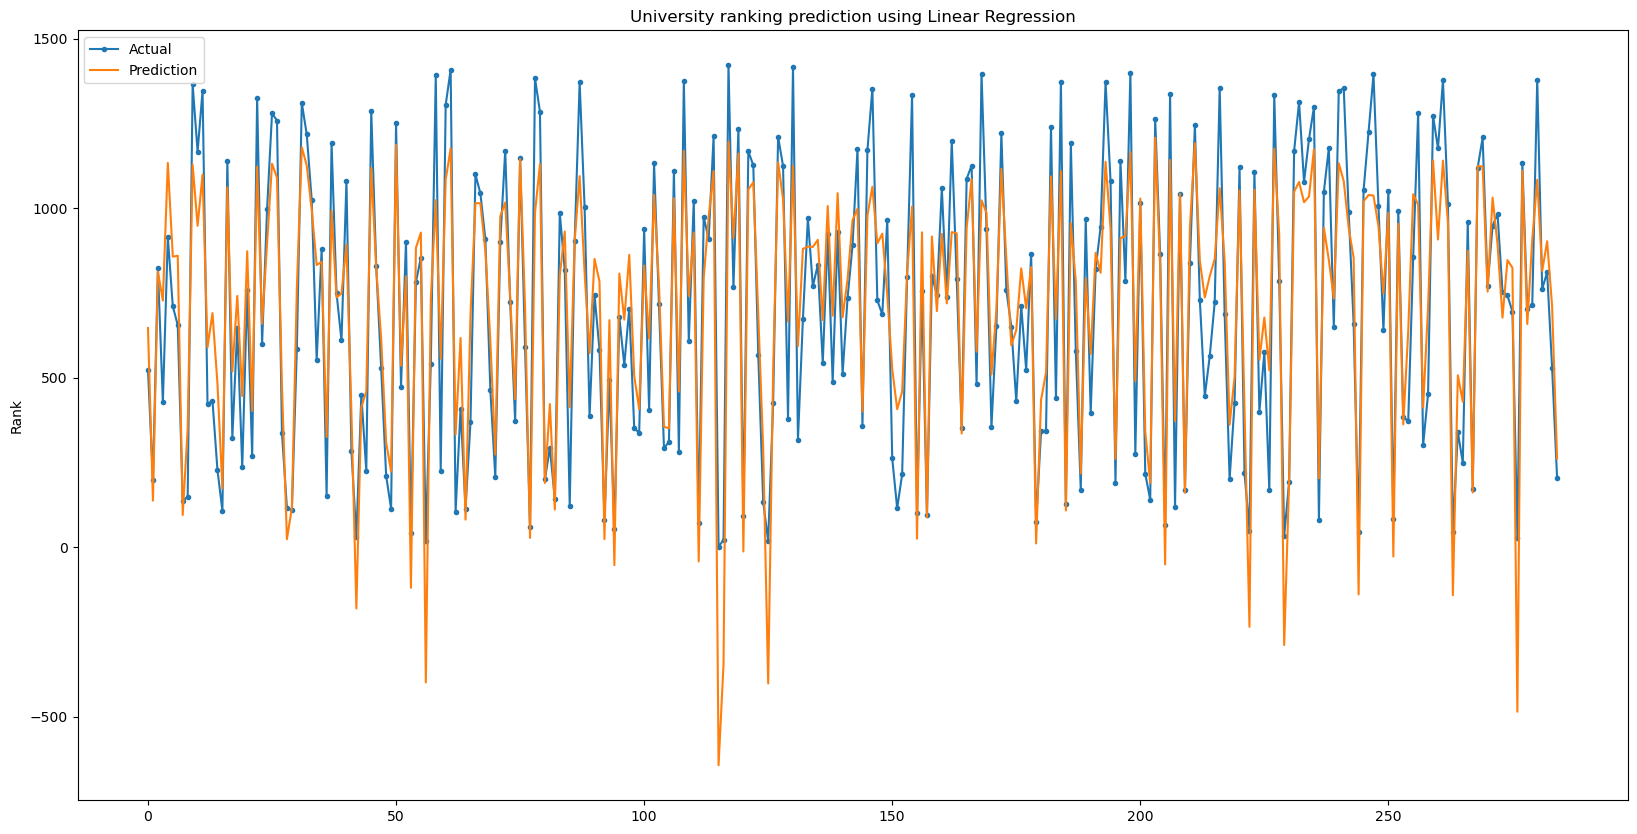

In [41]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_predict.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction using Linear Regression')
plt.legend()
plt.show()

Conclusion

The accuracy on test set is approximately 82.98% and on the training set is approximately 82.03%. The ranking prediction is acceptable. We can have a look at a predicted university which has the actual rank is 199 but is  predicted to be in rank 137. The prediction and reality is pretty close so this method is quite reliable

### Random Forest

Next i'm going to try Random Forest to see if it's better than Linear Regression.

In [29]:
regressor = RandomForestRegressor(max_depth=10, random_state=0) 
regressor.fit(x_train, y_train)

/tmp/ipykernel_86/953221466.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, random_state=0)

predict

In [30]:
y_pred = regressor.predict(x_test)

test accuracy

In [31]:
regressor.score(x_test, y_test)

0.9637975497753993

train accuracy

In [32]:
regressor.score(x_train, y_train)

0.989915585687171

MSE(Score Mean Squared Error)

In [33]:
mean_squared_error(y_test, y_pred)

6463.236344453907

RMSE(Score Root Mean Squared Error)

In [34]:
mean_squared_error(y_test, y_pred ,squared=False)

80.39425566826219

MAE(Score Mean Absolute Error)

In [35]:
mean_absolute_error(y_test, y_pred)

58.747459764400595

Compare the predicted results with the actual results using dataframe

In [46]:
compare_df = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
compare_df.head(5)

,Real,Predicted
0,524,558.261673
1,199,258.689591
2,823,746.779132
3,428,487.452056
4,915,971.186724


Visualize Data

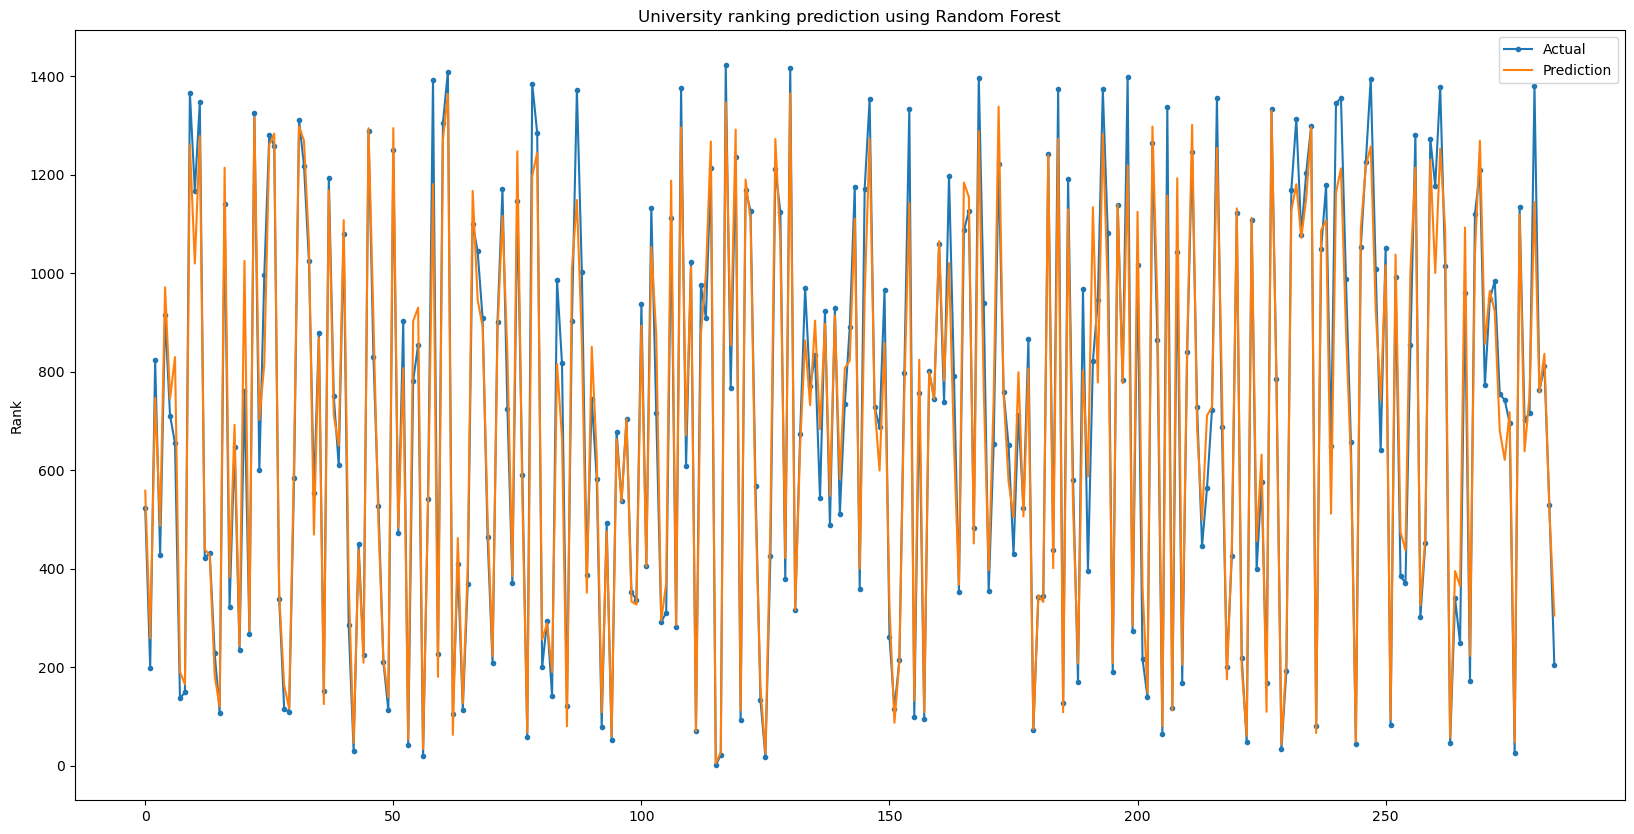

In [43]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction using Random Forest')
plt.legend()
plt.show()

Conclusion

With this Random Forest method, i was able to achieve the accuracy on test set is approximately 96.38% and on the training set is approximately 98.99% which is really high. The ranking prediction results are really good. We can have a look at a predicted university which has the actual ranking of 524 but was predicted rank 558. The reality is  very close to the prediction. This method gave me a better result than the linear regression which is even more reliable.